## Data is not completed yet it will be updated soon

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1]:
file_to_load = "./TB_processed_data/processed_data_without_neutral_values_01-04-22to04-07-22.parquet"
file_to_load2 = "./TB_processed_data/processed_data_without_neutral_values_19-08-22to14-06-2023.parquet"

In [5]:
df = pd.read_parquet(file_to_load)
df

,polarity,subjectivity,extractedts
0,0.166667,0.166667,2022-04-01 00:44:20.097867
1,0.800000,0.900000,2022-04-01 00:09:37.148770
2,0.069481,0.442316,2022-04-01 00:09:37.125654
3,-0.065000,0.185000,2022-04-01 00:31:39.674382
4,0.301894,0.355556,2022-04-01 00:09:37.101459
...,...,...,...
12313133,0.250000,0.250000,2022-07-04 00:59:54.684135
12313134,0.383333,0.583333,2022-07-04 01:33:57.282529
12313135,-0.083673,0.275510,2022-07-04 01:10:45.335862
12313136,-0.055556,0.227778,2022-07-04 01:10:45.324185


In [6]:
last_day = df['extractedts'].max().date()

In [7]:
#remove last day of tweets, because it is might be incomplete atm
print("Last day is: ", last_day)
df = df[df['extractedts'].dt.date != last_day]

Last day is:  2022-07-04


# PLOTS

<Axes: xlabel='polarity', ylabel='Count'>

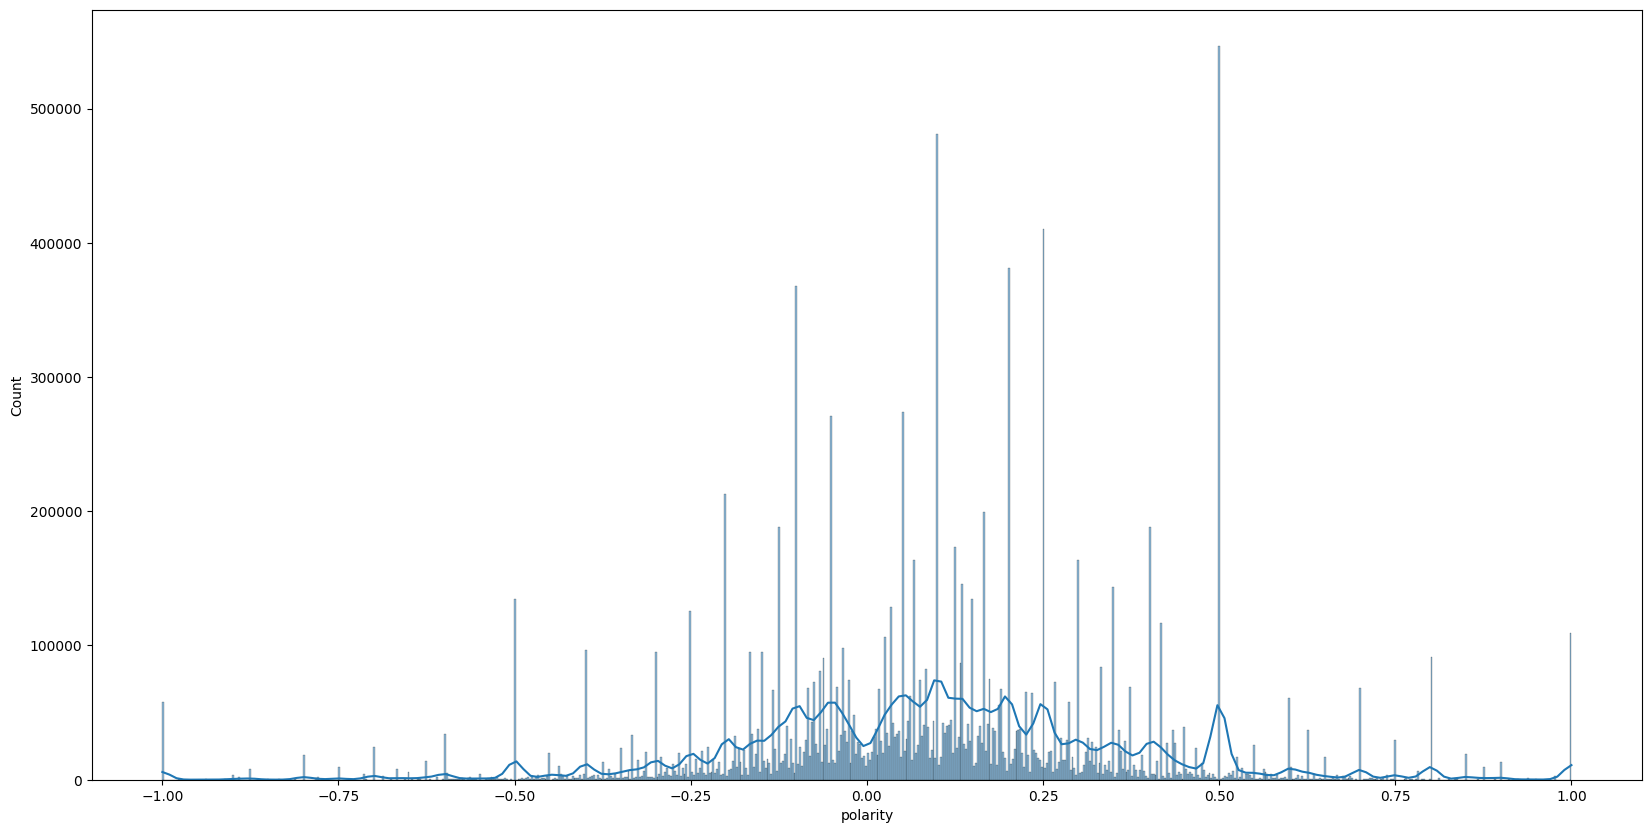

In [30]:
#create a histogram of polarity values with kde
plt.figure(figsize=(20, 10))
sns.histplot(df['polarity'], kde=True)


Number of tweets: 12,309,253
First tweet: 2022-04-01 00:01:44.782367
Last tweet: 2022-07-03 23:59:48.809981
This covers a period of: 93 days 23:58:04.027614


Text(0.5, 1.0, 'Number of tweets per hour')

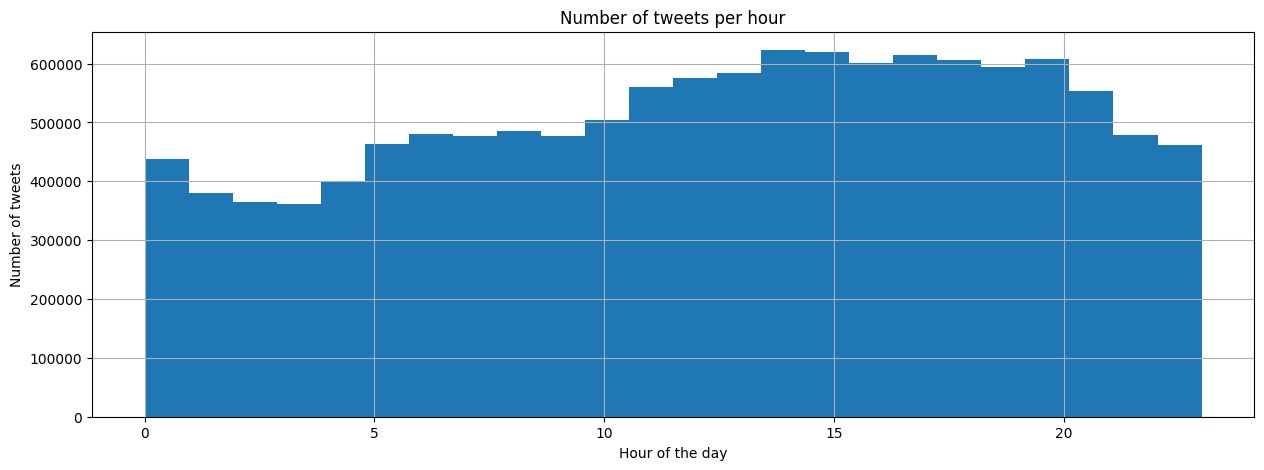

In [8]:
print("Number of tweets:", f"{len(df):,}")
print("First tweet:", df["extractedts"].min())
print("Last tweet:", df["extractedts"].max())
print("This covers a period of:", df["extractedts"].max() - df["extractedts"].min())

#show numbers of tweets per hour in histogram
df["extractedts"].dt.hour.hist(bins=24, figsize=(15, 5))
plt.xlabel("Hour of the day")
plt.ylabel("Number of tweets")
plt.title("Number of tweets per hour")

Text(0.5, 1.0, 'Number of tweets per day')

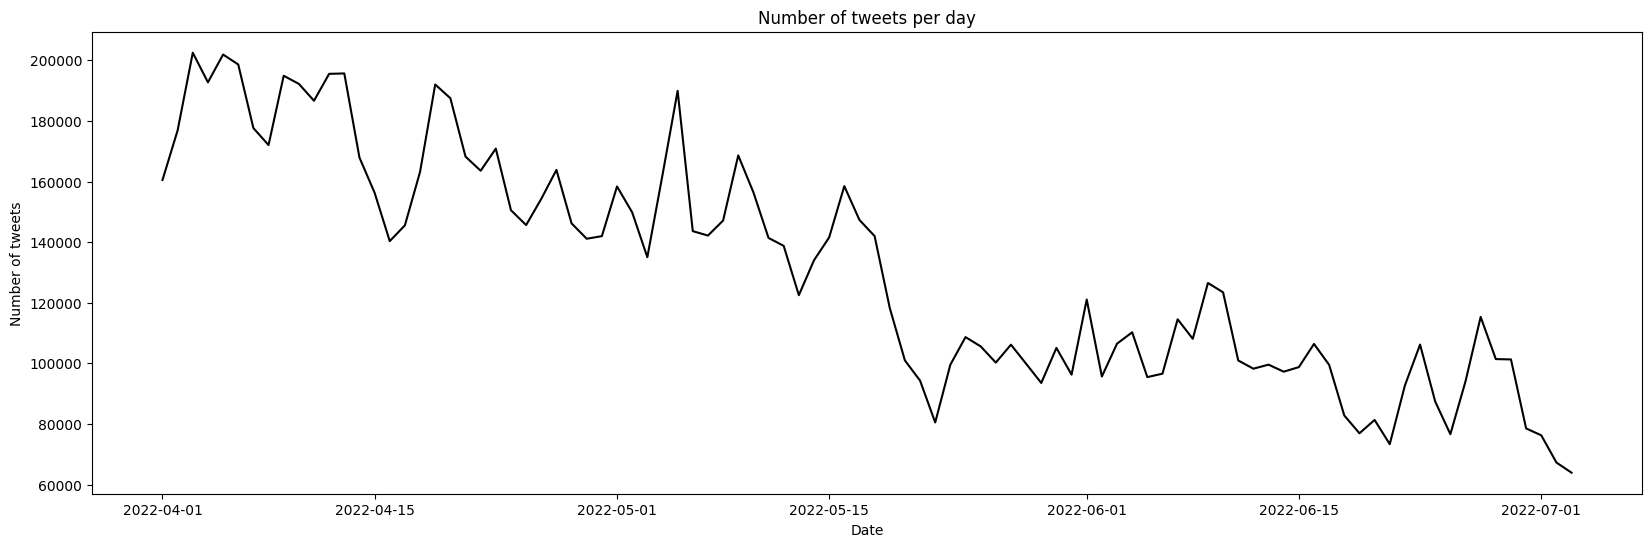

In [9]:
#show numbers of tweets per day over time
df["extractedts"].dt.date.value_counts().plot(figsize=(20, 6), color="black", linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Number of tweets")
plt.title("Number of tweets per day")

In [20]:
#sample df
df_sampled = df.sample(frac=0.1, random_state=1)
print("Number of all tweets:", f"{len(df):,}")
print("Number of sampled tweets:", f"{len(df_sampled):,}")

Number of all tweets: 12,309,253
Number of sampled tweets: 1,230,925


In [21]:
#shorten extractedts to just date
df_sampled["extractedts"] = df_sampled["extractedts"].dt.date

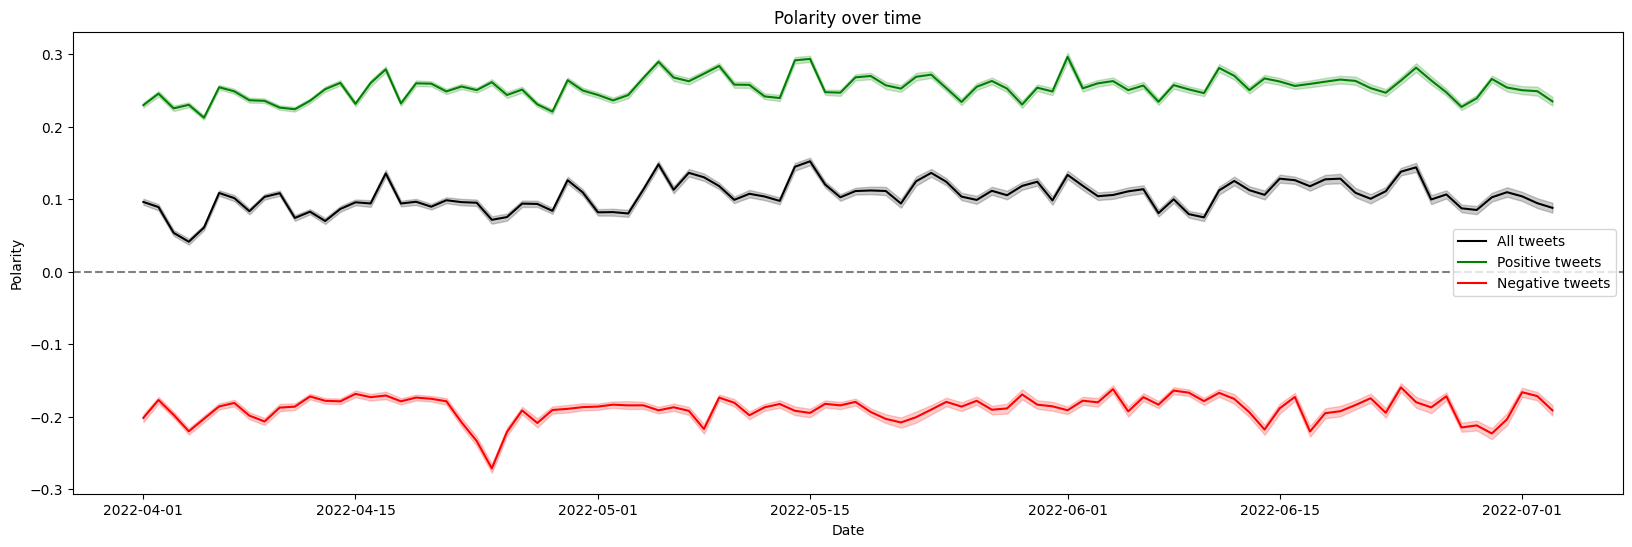

In [22]:
#create a plot that will show the polarity over time 
plt.figure(figsize=(20, 6))
sns.lineplot(x="extractedts", y="polarity", data=df_sampled, c = "black", label="All tweets")
sns.lineplot(x="extractedts", y="polarity", data=df_sampled[df_sampled["polarity"] > 0], c = "green", label="Positive tweets")
sns.lineplot(x="extractedts", y="polarity", data=df_sampled[df_sampled["polarity"] < 0], c = "red", label="Negative tweets")
#add grey abline at 0 to show neutral values
plt.axhline(y=0, color='grey', linestyle='--')
plt.title("Polarity over time")
plt.ylabel("Polarity")
plt.xlabel("Date")
plt.legend()



CORELATIONS:
Polarity and subjectivity: 0.45807864561838807
Polarity and tweet count: -0.37921769089307455
Subjectivity and tweet count: -0.13354106611141936


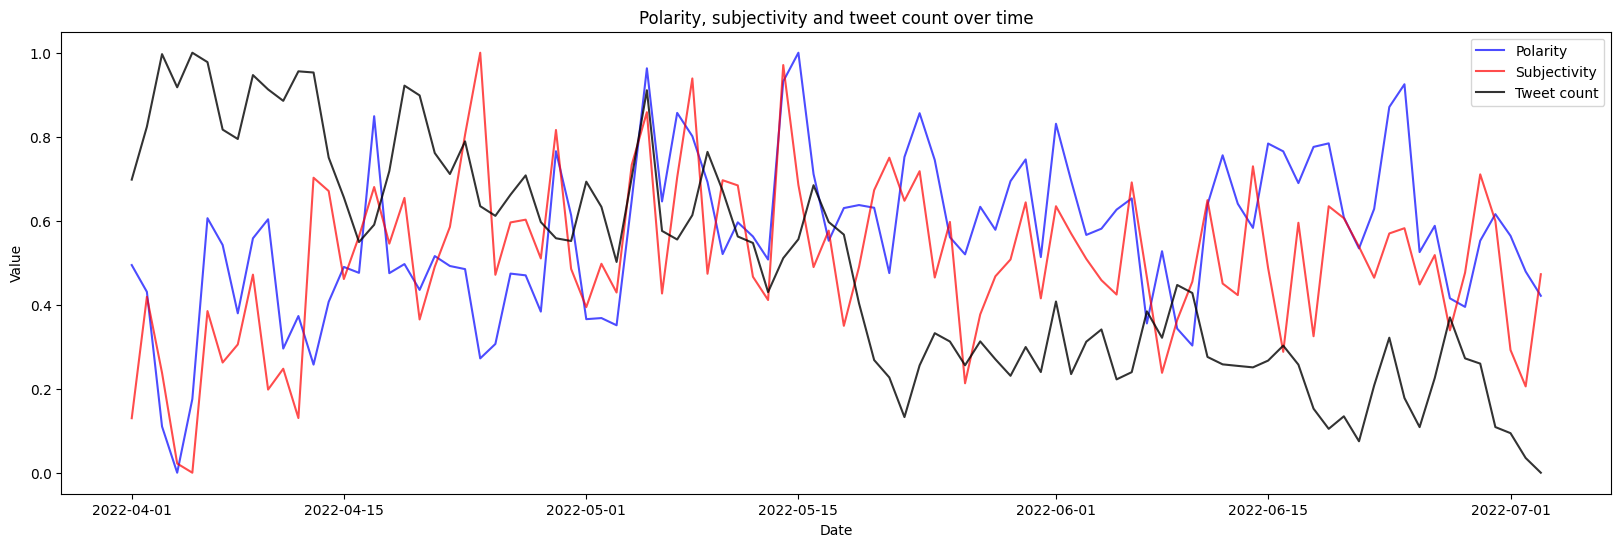

In [24]:
#create new dataframe with polarity and subjectivity and count of tweets per day
df_sampled = df_sampled.groupby("extractedts").agg({"polarity": "mean", "subjectivity": "mean", "extractedts": "count"})
df_sampled.rename(columns={"extractedts": "count"}, inplace=True)
df_sampled.reset_index(inplace=True)

#normalize all values to range 0-1
df_sampled["polarity"] = (df_sampled["polarity"] - df_sampled["polarity"].min()) / (df_sampled["polarity"].max() - df_sampled["polarity"].min())
df_sampled["subjectivity"] = (df_sampled["subjectivity"] - df_sampled["subjectivity"].min()) / (df_sampled["subjectivity"].max() - df_sampled["subjectivity"].min())
df_sampled["count"] = (df_sampled["count"] - df_sampled["count"].min()) / (df_sampled["count"].max() - df_sampled["count"].min())

# Create a figure with a white background and no grid lines
plt.figure(figsize=(20, 6), facecolor='white')

# Plot the lines with reduced opacity and lighter colors
sns.lineplot(x="extractedts", y="polarity", data=df_sampled, c="blue", label="Polarity", alpha=0.7)
sns.lineplot(x="extractedts", y="subjectivity", data=df_sampled, c="red", label="Subjectivity", alpha=0.7)
sns.lineplot(x="extractedts", y="count", data=df_sampled, c="black", label="Tweet count", alpha=0.8)

# Add a title, labels, and legend
plt.title("Polarity, subjectivity and tweet count over time")
plt.ylabel("Value")
plt.xlabel("Date")
plt.legend()

#calculate the correlation between all 3 pairs
print("CORELATIONS:")
print("Polarity and subjectivity:", df_sampled["polarity"].corr(df_sampled["subjectivity"]))
print("Polarity and tweet count:", df_sampled["polarity"].corr(df_sampled["count"]))
print("Subjectivity and tweet count:", df_sampled["subjectivity"].corr(df_sampled["count"]))
